# Artificial Neural Networks with Keras

* ANNs are at the very core of deep learning.

# A. From Biological to Artificial Neurons:

### A.1 Biological Neurons:

* A biological Neuron: <br>
&emsp; 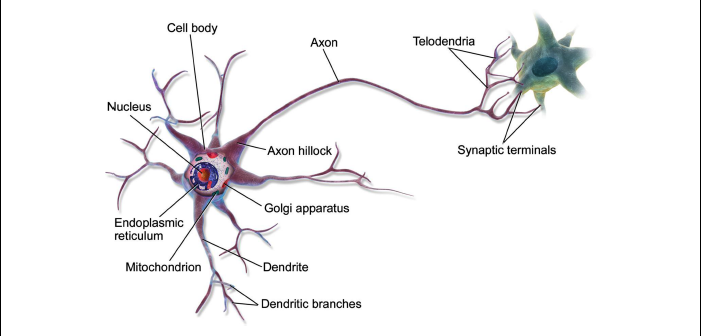

* Biological neurons produce short electrical impulses called *action potentials (APs, or just signals)*, which travel along the axons and make the synapses release chemical signals called *neurotransmitters*.
* When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (but actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).
* Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants.
* The architecture of biological neural networks (BNNs) is the subject of active research, but some parts of the brain have been mapped. These efforts show that neurons are often organized in consecutive layers, especially in the cerebral cortex (the outer layer of the brain).

### A.2. Logical Computations w/ Neurons:

* Artificial neuron
    * It has one or more binary (on/off) inputs and one binary output.
    * The artificial neuron activates its output when more than a certain number of its inputs are active.
    * Such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition you want.

* ANNs performing simple logical Computations: <br>
&emsp; 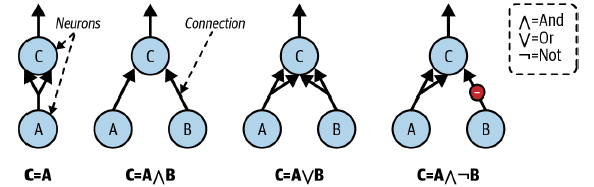
* $C\ =\ A$ : identity function, neuron C is activated if neuron A is activated, and v. versa.
* $C\ =\ A\ \wedge\ B$ : Logical AND, neuron is activated only when both neurons A and B are activated.
* $C\ =\ A\ \vee\ B$ : Logical OR, neuron C gets activated if either neuron A or neuron B is activated (or both).
* $C\ =\ A\ \wedge\ \rightharpoondown\ B$: Logical NOT, neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

### A.3. The Perceptron:

*  The perceptron is based on a slightly different artifical neuron called a *THRESHOLD LOGIC UNIT (TLU)* or *LINEAR THRESHOLD UNIT (LTU)*.
    * The inputs and outputs are numbers (instead of binary on/off values), and each input connection is associated w/ a weight.
    * The TLU first computes a linear function of its inputs: <br>
        &emsp; $z\ =\ w_1x_1\ +\ w_2x_2\ +...+\ w_nx_n\ +\ b\ =\ w^Tx+b$
    * Then the TLU applies a step function to the result:<br>
        &emsp; $h_w(x)\ =\ step(z)$ <br>
        &emsp; 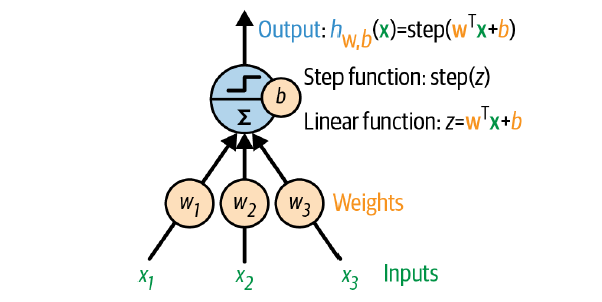

* Common step functions used in perceptrons (assuming threshold=0).
    * Heaviside Step Function: <br>
    &emsp; $heaviside(z) = \max \begin{dcases} \mathrm{0\ if\ z<0}  \\ \mathrm{1\ if\ z\geq0}  \\  \end{dcases}$
    * Sign Function: <br>
    &emsp; $sgn(z) = \max \begin{dcases} \mathrm{-1\ if\ z<0}  \\ \mathrm{0\ if\ z=0}  \\  \mathrm{+1\ if\ z>0}  \end{dcases}$

* A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer. <br>
&emsp; 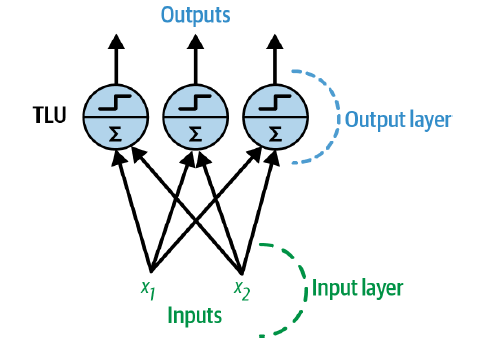
    * Computing the outputs of a fully connected layer: <br>
    &emsp; $h_{W,b}(X)\ =\ \phi(XW\ +\ b)$, where:
        * $X$ represents the matrix of input features. It has one row per instance and one column per feature.
        * $W$ is the weight matrix that contains all the connection weights. It has one row per input and once column per neuron.
        * $b$ is the bias vector that contains all the bias terms: one per neuron.
        * function $\phi$ is the ACTIVATION FUNCTION : when the artificial neurons are TLUs, it is a step function.

* How is a perceptron trained?
    * Hebb's Rule:
        * When a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. The connection weight between two neurons tends to increase when they fire simultaneously.
    * Perceptrons are trained using a variant of Hebb's rule that takes into account the error made by the network when it makes a prediction. The perceptron learning rule reinforces connections that help reduce the error.
        * The perceptron is fed one training instances at a time, and for each instance it makes its predictions.
        * For every output neuron that produced the wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
        * Perceptron Learning Rule (Weight Update): <br>
        &emsp; $w_{i,j}^{(next\ step)}\ =\ w_{i,j}\ +\ \eta(y_j\ -\ \hat{y}_j)x_i $ , <br>where:
            * $w_{i,j}$ = connection weight between the $i^{th}$ input and the $j^{th}$ neuron.
            * $x_i$ = the $i^{th}$ input value of the current training instance.
            * $\hat{y}_j$ = target output of the $j^{th}$ output neuron for the current training instance.
            * $\eta$ = learning rate.

* `sklearn.linear_model.Perceptron` class
    * Equivalent to using an `SGDClassifier` w/ hyperparameters : 
        * `loss="perceptron", learning_rate="constant", eta0=1, penalty="None"`

* Perceptrons are incapable of solving some trivial problems , e.g., the exclusive OR (XOR) classification problem. But this can be eliminated by stacking multiple perceptrons. The resulting ANN is called a multilayer perceptron (MLP). 
    * XOR Classification problem and an MLP that solves it (right): <br>
    &emsp; 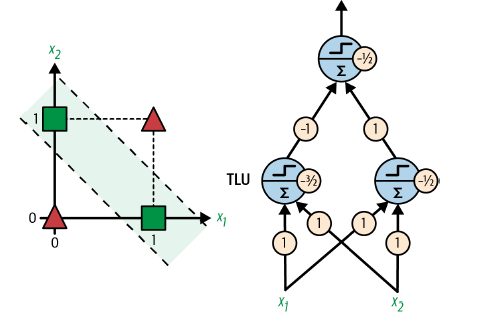

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # sample Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

### A.4. The Multilayer Perceptron and Backpropagation:
* An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer.
    * The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.
    * Example : Architecture of a multilayer perceptron w/ 2 inputs, 1 hidden layer of 4 neurons, and 3 output neurons. <br>
    &emsp; 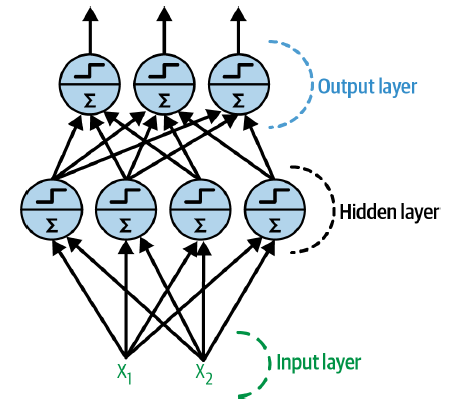
    * The signals flow only in one direction (from inputs to the outputs), so this architecture is an example of a *feedforward neural network (FNN)*.

* When an ANN contains deep stack of hidden layers, it is called a **deep neural network (DNN)**. 
    * The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations.

* Backpropagation:
    * Is a training technique for neural networks that makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter(reverse pass) and finally tweaks the connection weights and biases  to reduce the error (gradient descent step):
    * More specifically:
        * It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
        * Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
        * Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
        * Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule.
        * The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. This reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network.
        * Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

* It is important to initialized all the hidden layers' connnection weights randomly, or else training will fail.
    * For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. 
    * In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

* Activation Functions:
    * If there is no nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and that cannot solve very complex problems. Conversely, a large enough DNN w/ nonlinear activations can theoritically approximate any continuous function.
    * Common Activation Functions:
        * Sigmoid Function : $\sigma(z)\ =\Large\frac{1}{1 + \mathrm{exp}(-z)}$.
            * Has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step.
        * Hyperbolic Tangent Function: $\mathrm{tanh}(z)\ =\ 2\sigma(2z)\ -\ 1 $
            * Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
        * Rectified Linear Unit Function: $\mathrm{ReLU}(z)\ =\ \mathrm{max}(0, z)$
            * ReLU function is continuous bet not differentiable at z=0, and its derivative is 0 for z <0. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default.

(-4.5, 4.5, -0.2, 1.2)

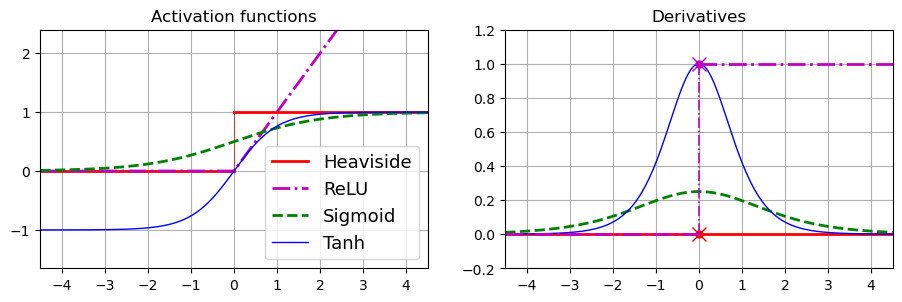

In [5]:
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

### A.5. Regression MLPs:
* MLPs can be used for regression tasks.
    * To predict a single value, a single output neuron is needed: its output is the predicted value.
    * For multivariate regression, one output neuron per output dimension is needed. For example, to locate the center of an object in an image, you need to predict two coordinates, so you need 2 output neurons.

* `sklearn.neural_network.MLPRegressor`:
    * 